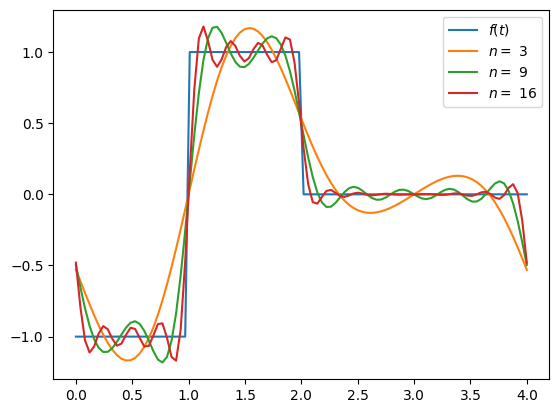

In [22]:
# imports
import numpy as np
import matplotlib.pyplot as plt


# original function
def func(t):
    out = np.zeros_like(t)
    out[t < 2] = 1.
    out[t < 1] = -1.

    return out

# our a_k series
def ak_fn(k):
    if k == 0:
        return 0.
    factor = np.exp(-1j * k * np.pi / 2) / (1j * np.pi * k)
    return factor * (-np.cos(k*np.pi / 2) + 1)

# synthesis eqn. for c.t. signals
def synth(t, n, ak_fn, period):
    out = np.zeros_like(t)
    for k in range(-n, n):
        out += np.real(ak_fn(k)*np.exp(1j * k * (2*np.pi / period) * t))
    return out

# create samples of times and functions values
ts = np.linspace(0, 4, 100)
fs = func(ts)

# make approximations for ifferent values of N
synths = {}
for k in [3, 9, 16]:
    synths[k] = synth(ts, k, ak_fn, 4)

# plot
fig, ax = plt.subplots()
ax.plot(ts, fs, label=r"$f(t)$")
for key in synths:
    ax.plot(ts, synths[key], label=f"$n = $ {key}")

ax.legend()
plt.savefig("figures/p2_synth.png")
plt.show()